In [1]:
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow import keras
from pathlib import Path
import tensorflow as tf
import yfinance as yf
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [2]:
# Download historical stock data for a specific ticker
ticker = 'AAPL'
stock_data = yf.download(ticker, start='2015-01-01', end='2020-01-01')

[*********************100%%**********************]  1 of 1 completed


In [3]:
display(stock_data)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.347166,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.661270,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.663500,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,23.995319,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,24.917276,237458000
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,68.898689,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.265663,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.238998,146266000


In [4]:
features = stock_data[['Close']]
target = stock_data['Close']  # Predicting next time step temperature

In [5]:
scaler = MinMaxScaler()

In [6]:
features_scaled = scaler.fit_transform(features)

In [7]:
target_reshaped = target.values.reshape(-1, 1)

In [8]:
target_scaled = scaler.fit_transform(target_reshaped)

In [9]:
x = []
y = []
time_steps = 30

for i in range(time_steps, len(features_scaled)):
    x.append(features_scaled[i-time_steps:i])
    y.append(target_scaled[i])

X, y = np.array(x), np.array(y)

In [10]:
# Function to build and train a Long Short Term Memory Deep Learning memory
def BuildModel(X_train, y_train):
    model = Sequential()
    # Use Input layer to specify the shape
    model.add(Input(shape=(X_train.shape[1], X_train.shape[2])))
    # Add LSTM layer
    model.add(LSTM(units=64, activation='relu'))
    # Output layer
    model.add(Dense(1))  # For regression (1 output)
    # Print model summary
    model.summary()
    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')
    # Fit the model with the training data
    history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.3)

    return model

In [11]:
X_train, X_test, y_train, y_test = X[:800], X[800:], y[:800], y[800:]

In [12]:
print(len(X_train)/len(X))
print(len(X_test)/len(X))

0.6514657980456026
0.3485342019543974


In [13]:
model = BuildModel(X_train, y_train)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - loss: 0.0163 - val_loss: 0.0304
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0023 - val_loss: 0.0163
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0011 - val_loss: 7.1620e-04
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.8963e-04 - val_loss: 0.0019
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2.4639e-04 - val_loss: 0.0011
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 2.2602e-04 - val_loss: 0.0012
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 2.0613e-04 - val_loss: 0.0013
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 2.1625e-04 - val_loss: 0.0018
Epoch 9/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 2.0924e-04 - val_loss: 0.0015
Epoch 10/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.8614e-04 - val_loss: 0.0015
Epoch 11/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 1.8714e-04 - val_loss: 9.1117e-04
Epoch 12/50
18/18 ━━━━

In [14]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0013
Test Loss: 0.0025309561751782894


In [15]:
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


In [16]:
# Calculate Error Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 0.0025309558996607527
MAE: 0.034408598585594335
RMSE: 0.05030860661617208


In [17]:
def plot_actual_vs_predicted(actual, predictions):
    # Plot Predictions vs Actual values
    plt.figure(figsize=(10,6))
    plt.plot(actual, label='Actual', color="green")
    plt.plot(predictions, label='Predicted', color="blue")
    plt.grid(True)
    plt.title('Actual vs Predicted')
    plt.xlabel('Sequential Day Number')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

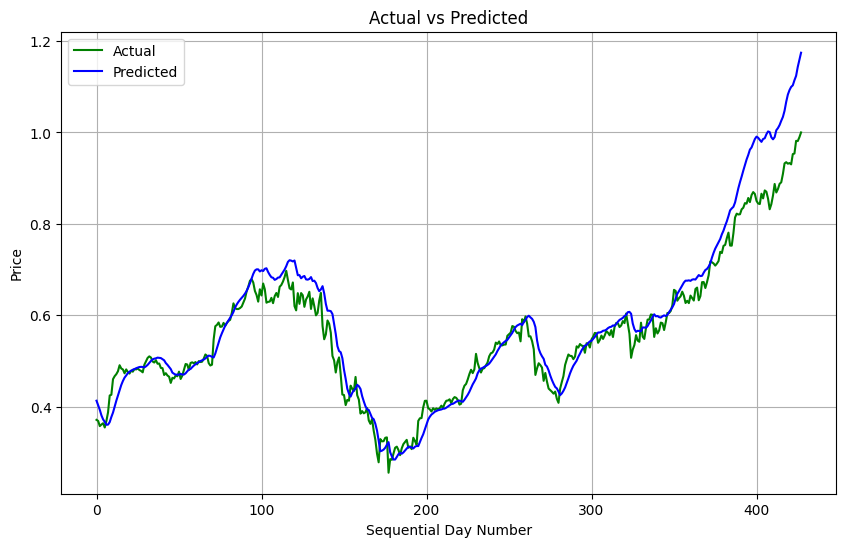

In [18]:
plot_actual_vs_predicted(
    actual=y_test, 
    predictions=predictions
)

In [19]:
def plot_error_distribution(actual, predictions):
    # Plot Error Distribution
    errors = y_test - predictions
    plt.figure(figsize=(10,6))
    plt.hist(errors, bins=50)
    plt.title('Prediction Error Distribution')
    plt.xlabel('Error')
    plt.ylabel('Frequency')
    plt.show()

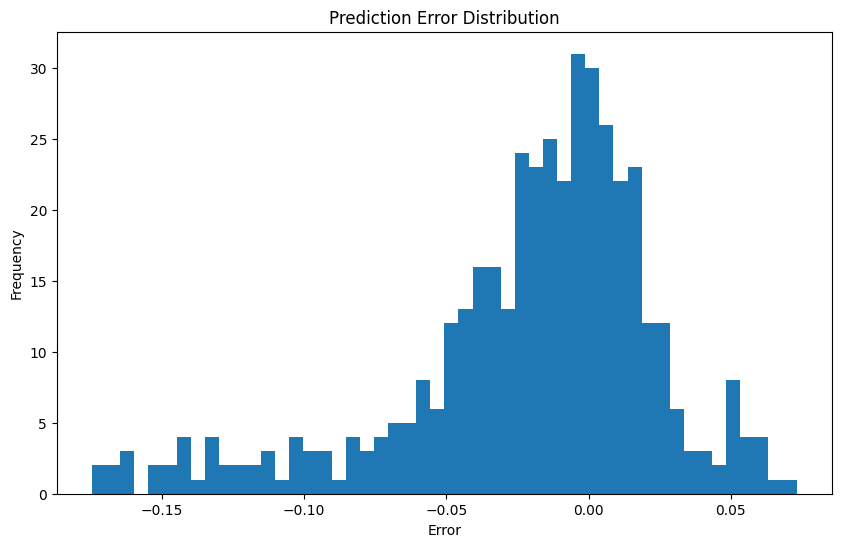

In [20]:
plot_error_distribution(
    actual=y_test, 
    predictions=predictions
)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print(len(X_train)/len(X))
print(len(X_test)/len(X))

0.6995114006514658
0.3004885993485342


In [23]:
model = BuildModel(X_train, y_train)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,961 (66.25 KB)

 Trainable params: 16,961 (66.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0730 - val_loss: 0.0071
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0057 - val_loss: 0.0013
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0013 - val_loss: 8.6684e-04
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 7.2589e-04 - val_loss: 6.5770e-04
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 6.1071e-04 - val_loss: 5.2157e-04
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 5.7083e-04 - val_loss: 5.1778e-04
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 5.5042e-04 - val_loss: 5.0422e-04
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 5.3604e-04 - val_loss: 4.6058e-04
Epoch 9/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 4.7875e-04 - val_loss: 5.5539e-04
Epoch 10/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 4.7307e-04 - val_loss: 4.7681e-04
Epoch 11/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 5.3640e-04 - val_loss: 4.6438

In [24]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 3.2565e-04
Test Loss: 0.0003313456545583904


In [25]:
# Make predictions
predictions = model.predict(X_test)
predictions = predictions.reshape(-1, 1)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


In [26]:
# Calculate Error Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate errors
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MSE: 0.0003313456625254255
MAE: 0.012963236123252416
RMSE: 0.018202902585176504


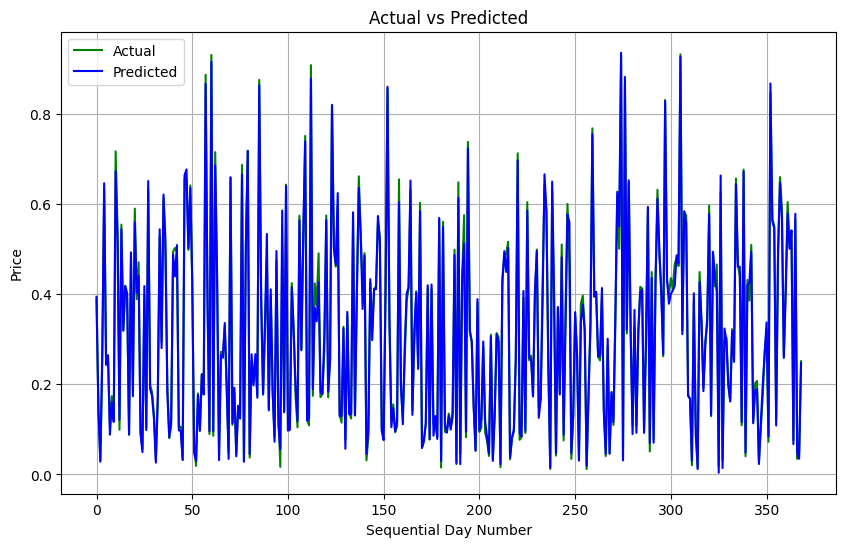

In [27]:
plot_actual_vs_predicted(
    actual=y_test, 
    predictions=predictions
)

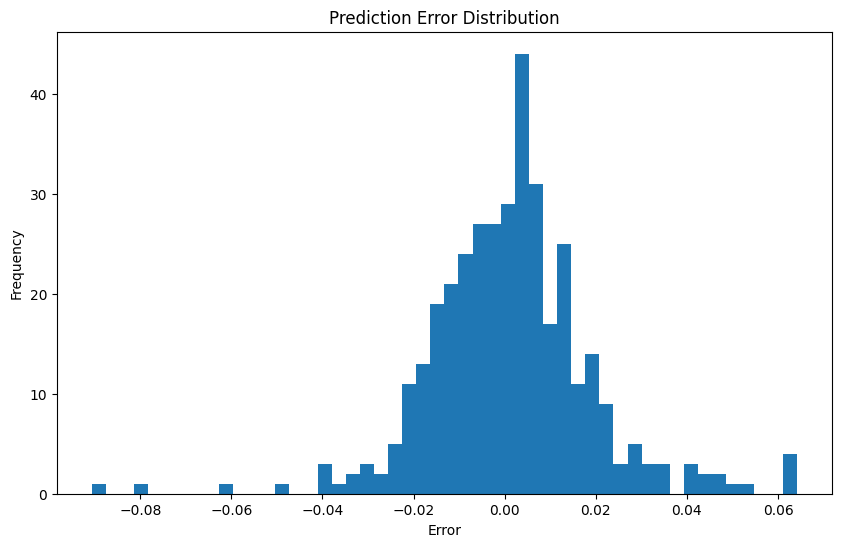

In [28]:
plot_error_distribution(
    actual=y_test, 
    predictions=predictions
)